# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [2]:
import pandas as pd

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the "correct" name

In [3]:
df = pd.read_csv("animals.csv")
df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [4]:
df.shape

(6, 3)

In [5]:
df.dtypes

animal    object
name      object
length     int64
dtype: object

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but not the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [6]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [7]:
df.sort_values(by="length", ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [8]:
df["length"].mean()

43.666666666666664

In [9]:
df["length"].std()

12.516655570345725

In [10]:
#or with a single command

In [11]:
df["length"].describe()

count     6.000000
mean     43.666667
std      12.516656
min      32.000000
25%      35.000000
50%      40.000000
75%      48.750000
max      65.000000
Name: length, dtype: float64

## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [12]:
df["animal"].describe()

count       6
unique      2
top       cat
freq        3
Name: animal, dtype: object

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [13]:
df["animal"] == "dog"

0    False
1    False
2     True
3     True
4    False
5     True
Name: animal, dtype: bool

In [14]:
df[df["animal"] == "dog"]

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [15]:
df[df["length"] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [20]:
df['lenght_in'] = df['length'] * 0.39370079
df.head()

,animal,name,length,lenght_in
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716536
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685040
4,cat,Charlie,32,12.598425


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [24]:
cats = df[df["animal"] == "cat"]
cats

,animal,name,length,lenght_in
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716536
4,cat,Charlie,32,12.598425


In [60]:
dogs = df[df["animal"] == "dog"]
dogs

,animal,name,length,lenght_in
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685040
5,dog,Fontaine,35,13.779528


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [67]:
cats[cats["lenght_in"] > 12]

,animal,name,length,lenght_in
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716536
4,cat,Charlie,32,12.598425


In [68]:
df[(df["animal"] == "cat") & (df["lenght_in"] > 12)]

,animal,name,length,lenght_in
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716536
4,cat,Charlie,32,12.598425


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [71]:
cats["length"].mean()

37.333333333333336

In [72]:
dogs["length"].mean()

50.0

## 13) If you didn't already, use `groupby` to do #12 all at once

In [73]:
df.groupby('animal')['length'].mean()

animal
cat    37.333333
dog    50.000000
Name: length, dtype: float64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

In [94]:
%matplotlib inline

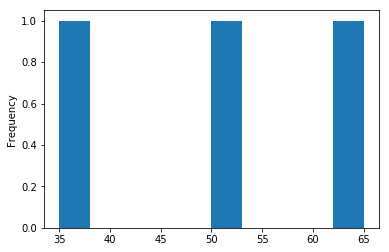

In [95]:
dogs['length'].plot(kind='hist')

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** You can set a custom size for your plot by sending it something like `figsize=(2,15)`

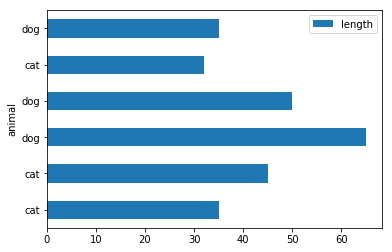

In [97]:
df.plot(kind='barh', x='animal', y='length')

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

In [103]:
cats.sort_values(by="length", ascending=False)

,animal,name,length,lenght_in
1,cat,Bob,45,17.716536
0,cat,Anne,35,13.779528
4,cat,Charlie,32,12.598425


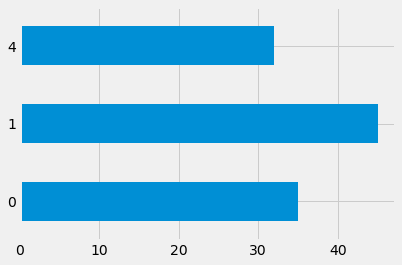

In [129]:
cats['length'].plot(kind='barh')

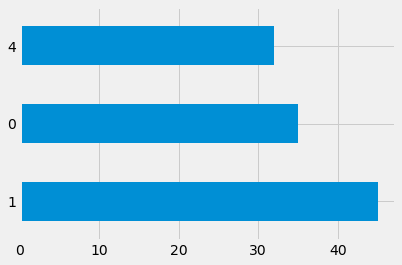

In [130]:
cats.sort_values(by="length", ascending=False)['length'].plot(kind='barh')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

In [108]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

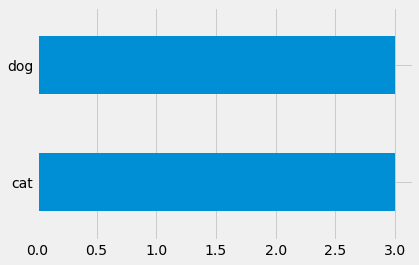

In [117]:
df['animal'].value_counts().plot(kind='barh')